In [ ]:
# Sprint 4 
# 1. Performance Analysis: Logistic Regression for Classification

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Football_data_merged_cleaned.csv")

Accuracy (Team Win Prediction): 0.5348258706467661
Confusion Matrix:
[[188  22]
 [165  27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.90      0.67       210
           1       0.55      0.14      0.22       192

    accuracy                           0.53       402
   macro avg       0.54      0.52      0.45       402
weighted avg       0.54      0.53      0.46       402



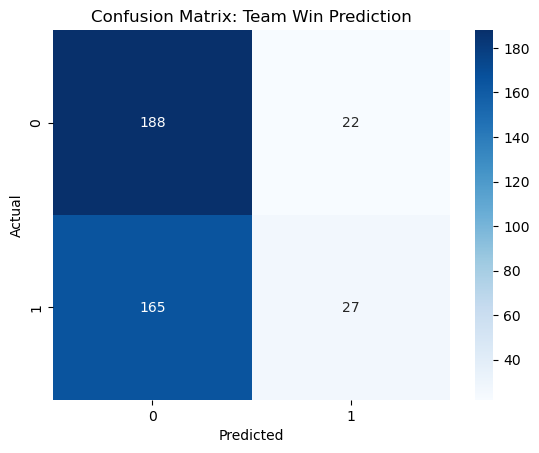

Accuracy (High Scoring Player Classification): 0.9477611940298507
Confusion Matrix:
[[381   0]
 [ 21   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       381
           1       0.00      0.00      0.00        21

    accuracy                           0.95       402
   macro avg       0.47      0.50      0.49       402
weighted avg       0.90      0.95      0.92       402



C:\Users\nagap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nagap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nagap\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


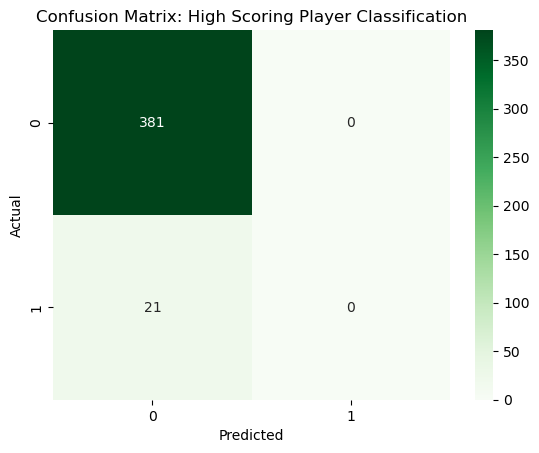

In [7]:
# Q1: Predicting Team Win

df['win'] = np.where(df['home_club_goals'] > df['away_club_goals'], 1, 0)
X = df[['goals', 'assists', 'minutes_played']].fillna(0)
y = df['win']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Accuracy (Team Win Prediction):", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Team Win Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Q2: Classifying High Scoring Players
df['high_scoring'] = np.where(df['goals'] > 1, 1, 0)
X = df[['assists', 'minutes_played', 'yellow_cards']].fillna(0)
y = df['high_scoring']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Accuracy (High Scoring Player Classification):", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix: High Scoring Player Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [3]:
# 2.Player Profile and Market Value: Descriptive Analysis

Average Market Value by Position:
position
Attack        5.390014e+06
Midfield      5.341668e+06
Defender      3.058933e+06
Goalkeeper    2.785034e+06
Name: market_value_in_eur, dtype: float64


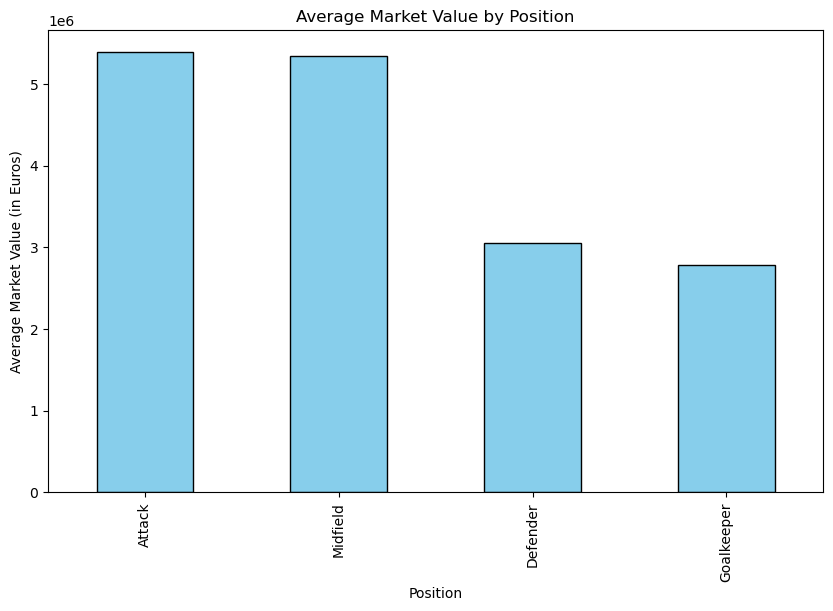

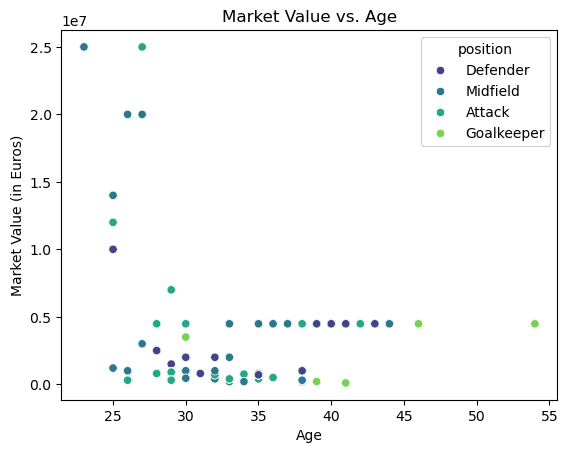

Market Value Trend Over Last Season:
last_season
2012.0    4.483561e+06
2013.0    3.817098e+06
2014.0    2.203605e+06
2015.0    2.333675e+06
2016.0    2.554953e+06
2017.0    4.483561e+06
2018.0    9.672079e+05
2019.0    3.420903e+06
2020.0    3.549380e+06
2021.0    6.840000e+06
2022.0    9.521739e+05
2023.0    1.106290e+07
Name: market_value_in_eur, dtype: float64


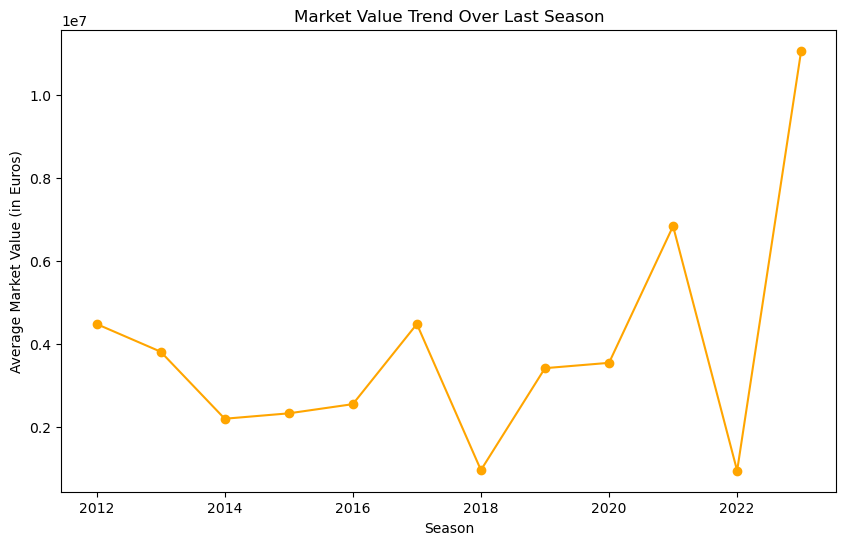

Top Agents by Average Market Value:
agent_name
BS Group - BS Law      1.400000e+07
Joes Blakborn          1.000000e+07
YMU Management Ltd.    8.435532e+06
Wasserman              8.401873e+06
Unknown                7.013810e+06
Gestifute              7.000000e+06
Robert Schneider       4.483561e+06
ARP Sportmarketing     4.483561e+06
CMG Sports             4.483561e+06
Prosport               4.483561e+06
Name: market_value_in_eur, dtype: float64


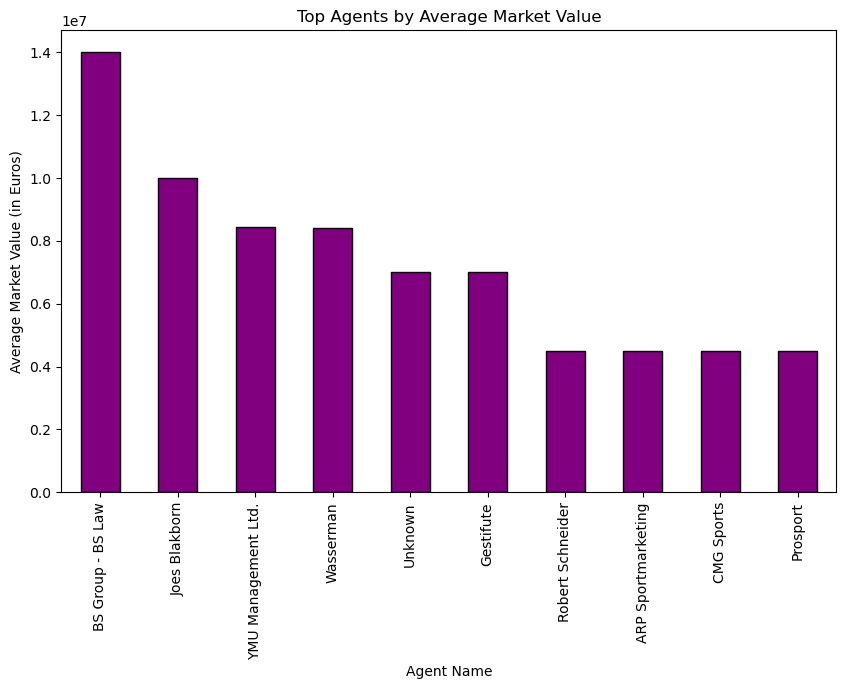

In [5]:
# Q1: Average Market Value by Position
position_market_value = df.groupby('position')['market_value_in_eur'].mean().sort_values(ascending=False)
print("Average Market Value by Position:")
print(position_market_value)

position_market_value.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Average Market Value by Position')
plt.xlabel('Position')
plt.ylabel('Average Market Value (in Euros)')
plt.show()

# Q2: Market Value vs. Age
df['age'] = 2025 - pd.to_datetime(df['date_of_birth']).dt.year
sns.scatterplot(data=df, x='age', y='market_value_in_eur', hue='position', palette='viridis')
plt.title('Market Value vs. Age')
plt.xlabel('Age')
plt.ylabel('Market Value (in Euros)')
plt.show()

# Q3: Market Value Trend (Last Season)
last_season_value = df.groupby('last_season')['market_value_in_eur'].mean()
print("Market Value Trend Over Last Season:")
print(last_season_value)

last_season_value.plot(kind='line', figsize=(10, 6), marker='o', color='orange')
plt.title('Market Value Trend Over Last Season')
plt.xlabel('Season')
plt.ylabel('Average Market Value (in Euros)')
plt.show()

# Q4: Agents Managing High Market Value Players
top_agents = df.groupby('agent_name')['market_value_in_eur'].mean().sort_values(ascending=False).head(10)
print("Top Agents by Average Market Value:")
print(top_agents)

top_agents.plot(kind='bar', figsize=(10, 6), color='purple', edgecolor='black')
plt.title('Top Agents by Average Market Value')
plt.xlabel('Agent Name')
plt.ylabel('Average Market Value (in Euros)')
plt.show()


In [ ]:
Interpretation

Logistic Regression will provide insights into the predictive power of features like goals, assists, and minutes played for team wins and high-scoring players.
Descriptive Analysis will identify trends and patterns in player market values, including the influence of age, position, and agents.
Example Interpretations:

Performance Analysis: If accuracy is high in win prediction, it indicates strong predictive power of player metrics. For high-scoring players, features like assists and minutes played may strongly contribute.
Player Profile & Market Value: Positions like strikers might have the highest market value. Younger players might show higher market values due to potential growth, and top agents manage players with substantial market value.